# Logistic Regression Assignment
---

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

You will work with the [heart.csv](../Data/heart.csv) file which contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Data dictionary:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

## Q1: Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
# Load data
df = pd.read_csv('../Data/heart.csv')

## Q2: EDA

Explore if the dataset has any missing data points and create a statistical summary of the numerical features.

Feel free to explore the data further on your own.

In [3]:
# The first 5 rows of the DataFrame (get a quick overview of the data)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Check for missing values

missing_data = df.isnull().sum()
print("Missing Data:")
missing_data

Missing Data:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Statistical summary of numerical features

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


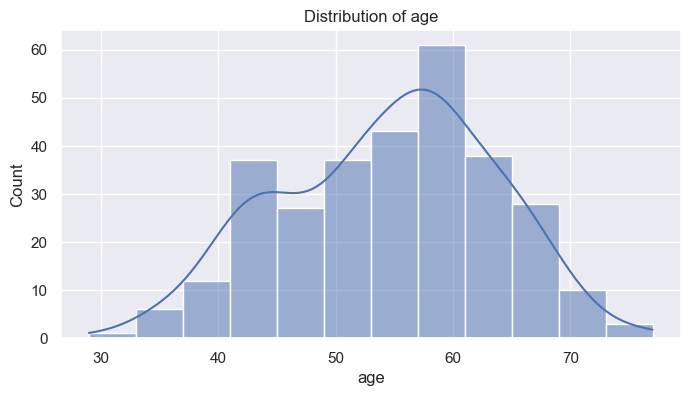

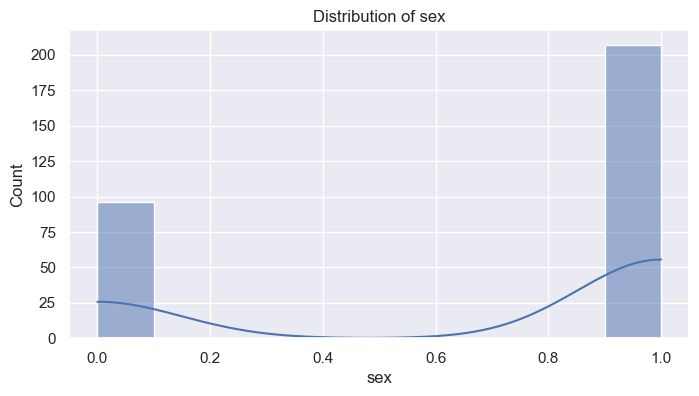

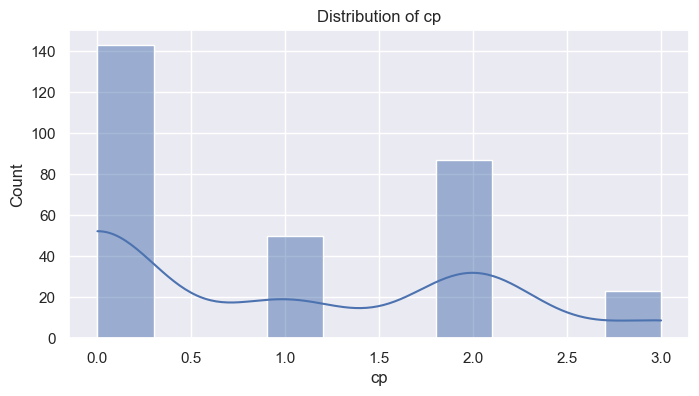

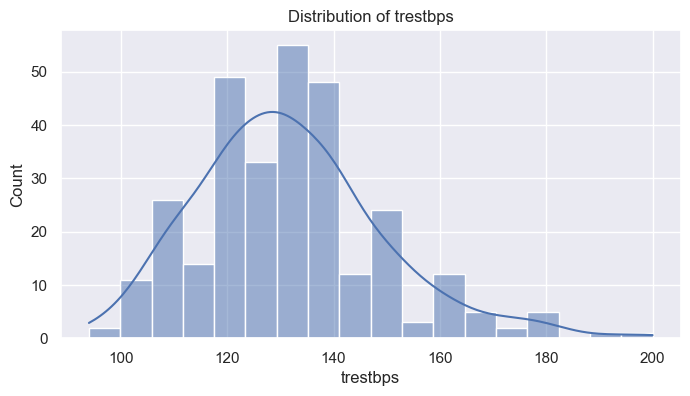

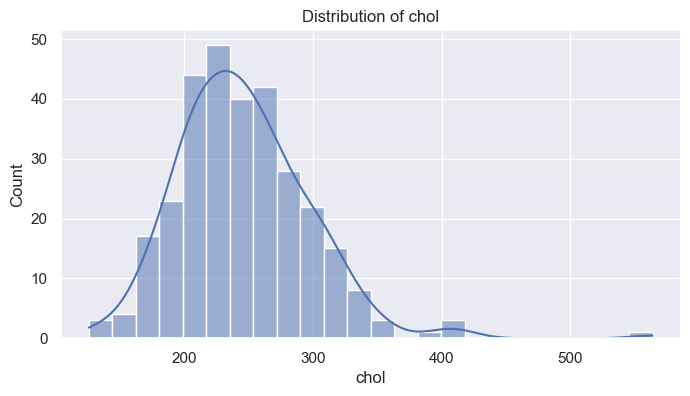

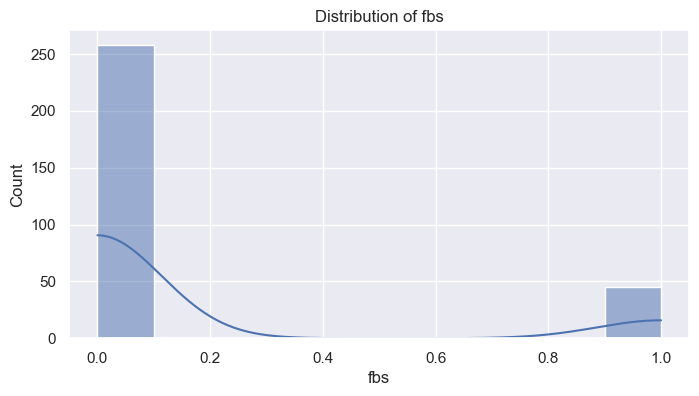

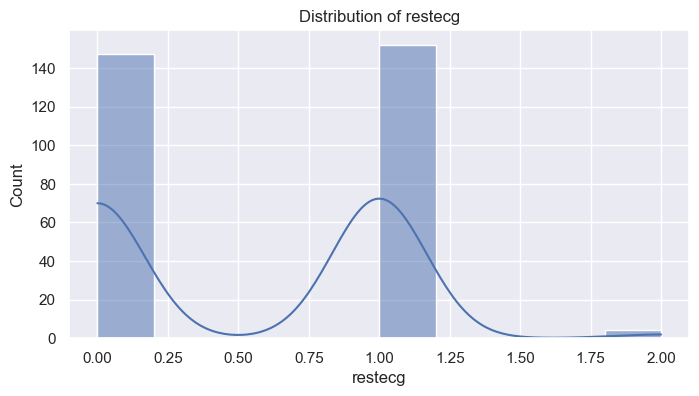

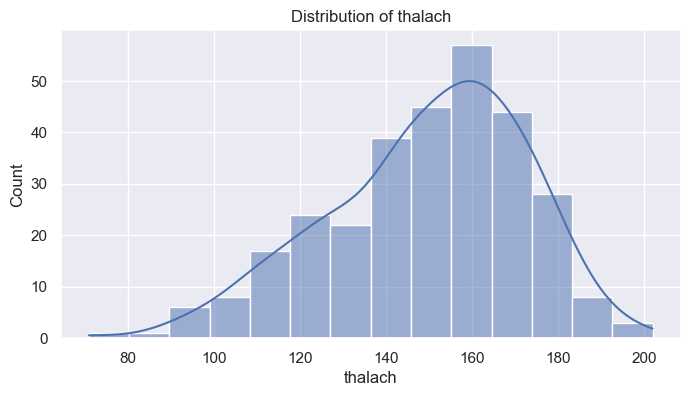

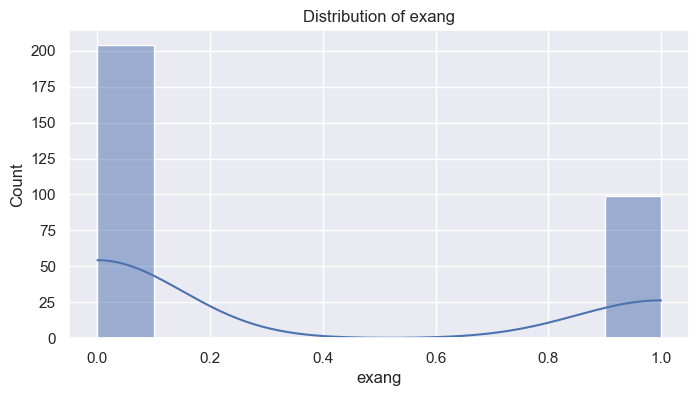

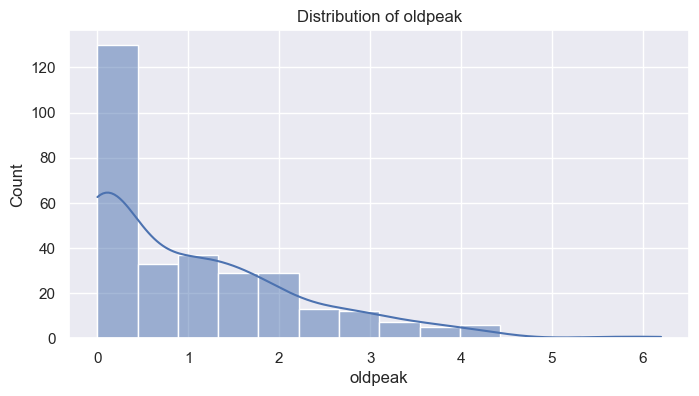

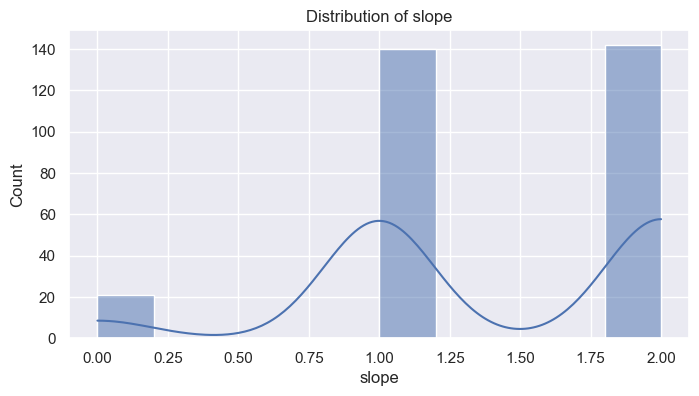

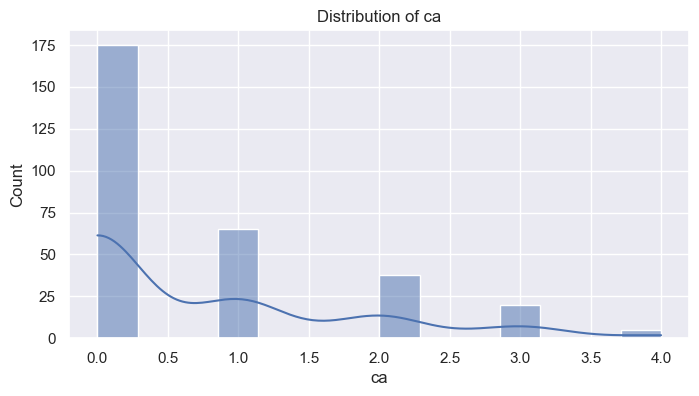

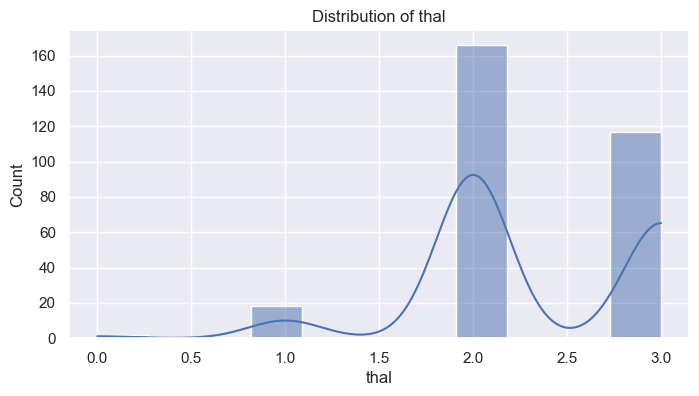

In [7]:
# The distribution of each feature
for column in df.columns:
    if column != 'target':
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

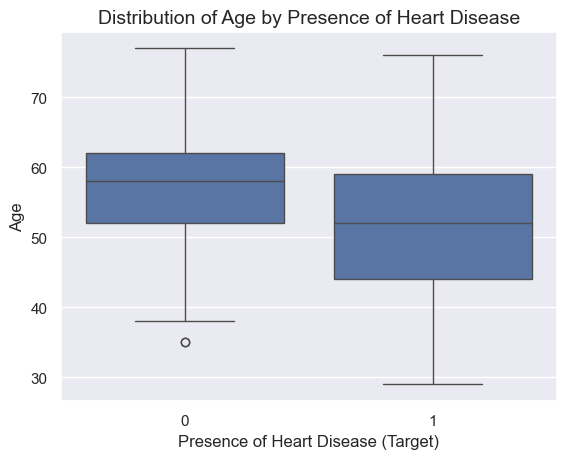

In [8]:
# Create a boxplot to visualize the distribution of 'age' by 'target' class

sns.boxplot(data=df, x="target", y="age")
plt.xlabel("Presence of Heart Disease (Target)", fontsize=12)  
plt.ylabel("Age", fontsize=12)
plt.title("Distribution of Age by Presence of Heart Disease", fontsize=14)  

plt.show()

In [9]:
# Sort the correlations in descending order to identify the most strongly correlated features

correlation = df.corr()
correlation['target'].drop("target").abs().sort_values(ascending=False)

exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

## Q3: Visualization 
1. Create a bar plot that shows the total counts per target value.
2. Create a pairplot that displays the relationships between the following columns:

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

3. Create a heatmap that displays the correlation between all the columns.

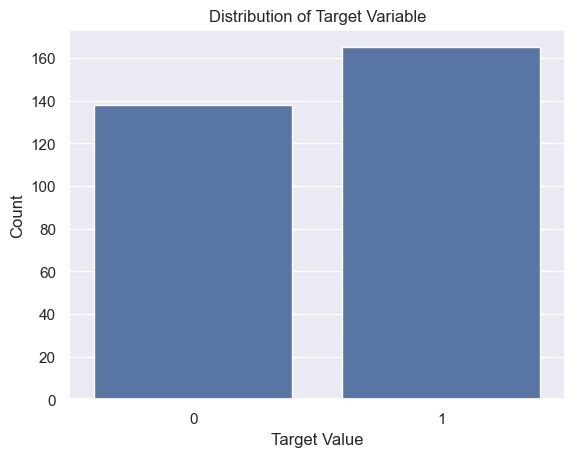

In [10]:
# Barplot
sns.countplot(data=df,x='target')
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

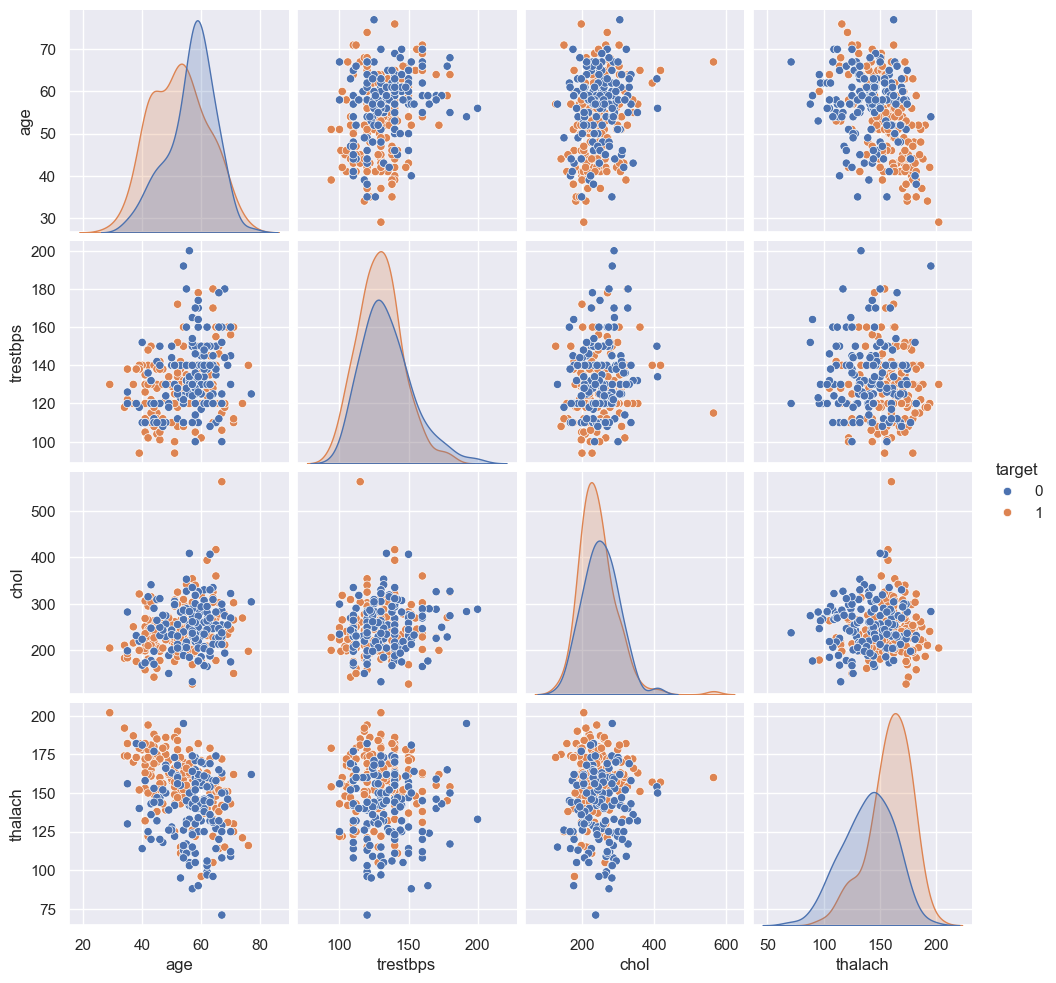

In [11]:
# Pairplot

sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']],hue='target')

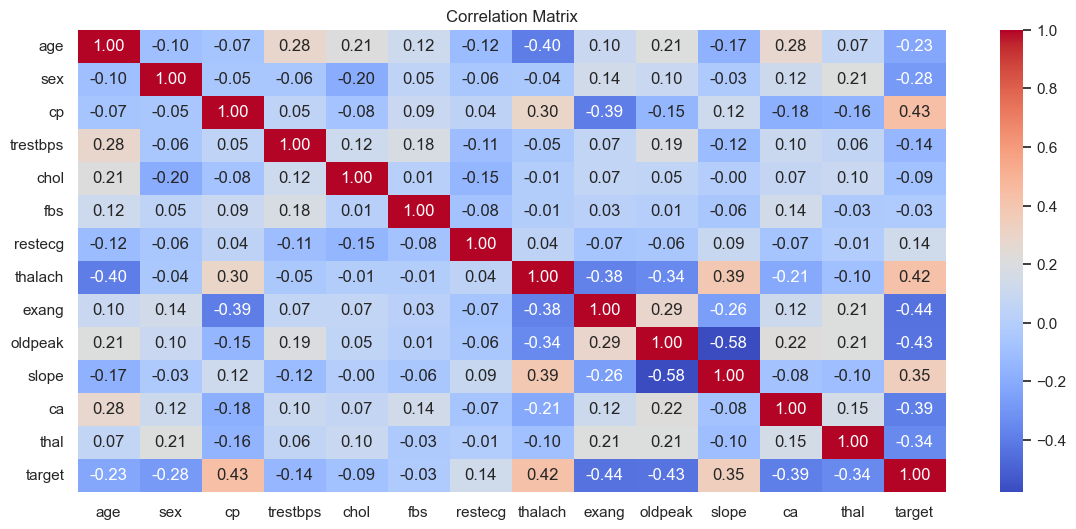

In [12]:
# Heatmap
plt.figure(figsize=(14,6))
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Q4: Prepare Data for Analysis
1. Separate the features from the labels into 2 objects, X and y.
2. Split the data into training-testing data
3. Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set)

In [13]:
# X and y

X = df.drop("target",axis=1)
y = df['target']

In [14]:
# Train-test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# Scale data

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Q5: Logistic Regression Model

1. Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.
2. Report back your search's optimal parameters, specifically the C value.
3. Report back the model's coefficients.
4. Bonus: Create a visualization of the coefficients by using a barplot of their values.

In [16]:
# Create model

log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

# Penalty Type

penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)

C = np.logspace(0, 4, 10)

# Initialize a GridSearchCV object with the logistic regression model and parameter grid

grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty},verbose=1)
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [17]:
# Model parameters

print("Optimal Parameters: ", grid_model.best_params_)

Optimal Parameters:  {'C': 2.7825594022071245, 'penalty': 'l2'}


In [18]:
# Obtain C value

print("C value :", grid_model.best_params_['C'])

C value : 2.7825594022071245


In [19]:
print("Best Cross-Validation Score: ", grid_model.best_score_)

Best Cross-Validation Score:  0.8221088435374149


In [20]:
# Retrieve the best model from grid search

best_model = grid_model.best_estimator_
best_model

LogisticRegression(C=2.7825594022071245, max_iter=5000, multi_class='ovr',
                   solver='saga')

In [22]:
best_model.coef_

array([[-0.08264292, -0.82091445,  0.85426799, -0.28741709, -0.18918948,
         0.09535131,  0.30168503,  0.40824135, -0.52987379, -0.70788927,
         0.45236182, -0.82506383, -0.58459761]])

In [23]:
# Model's coefficients
coefficients = best_model.coef_
print("Model Coefficients:\n")
for i in range(len(coefficients[0])):
    print("Coefficient",i+1,":",coefficients[0][i])

Model Coefficients:

Coefficient 1 : -0.08264291835146176
Coefficient 2 : -0.820914449822702
Coefficient 3 : 0.8542679932803813
Coefficient 4 : -0.2874170905554211
Coefficient 5 : -0.18918948392768795
Coefficient 6 : 0.09535130964054289
Coefficient 7 : 0.3016850306986999
Coefficient 8 : 0.40824135099129305
Coefficient 9 : -0.5298737904846268
Coefficient 10 : -0.7078892664674539
Coefficient 11 : 0.4523618197683119
Coefficient 12 : -0.8250638250298638
Coefficient 13 : -0.5845976084657137


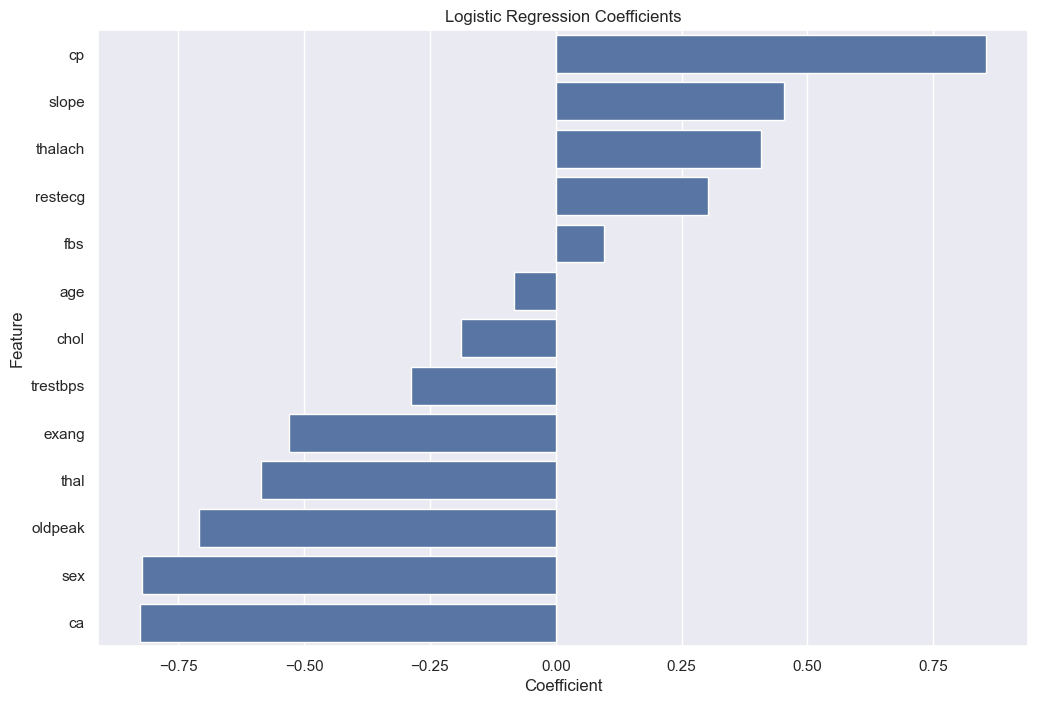

In [24]:
# Barplot of coefficients

# Flatten the coefficients array if it's multidimensional

coefficients = coefficients.flatten()

# Create a DataFrame for plotting

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot the coefficients

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Logistic Regression Coefficients')
plt.show()

## Q6: Model Evaluation

1. Create the following evaluations:
    * Confusion Matrix Array
    * Confusion Matrix Plot
    * Classification Report
2. Create both the precision-recall curve and the ROC Curve.

In [25]:
# Confusion matrix

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

y_pred = best_model.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  4]
 [ 5 27]]


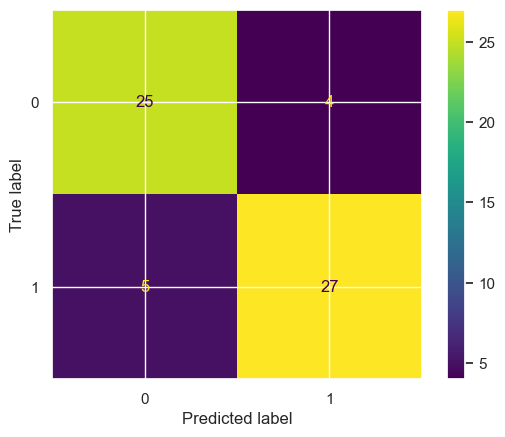

In [26]:
# Confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=grid_model.classes_)
disp.plot()
plt.show()

In [27]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



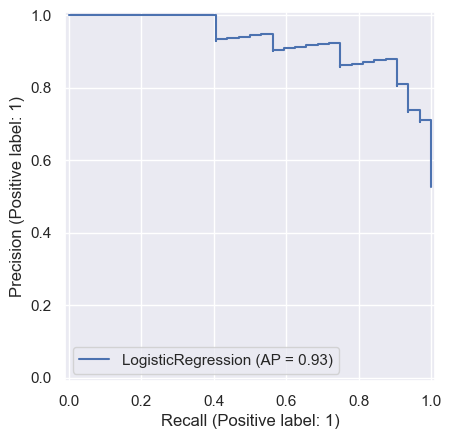

In [28]:
# precision-recall curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=best_model, X= scaled_X_test, y=y_test)
plt.show()

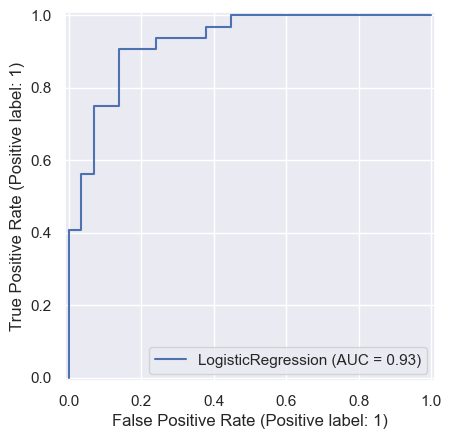

In [29]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=best_model, X=scaled_X_test, y=y_test)
plt.show()

## Q7: Make Prediction

A patient with the following features has come into the medical office:

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0
    
What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?

In [30]:
# New patient data

new_patient = pd.DataFrame({
    'age': [48.0],
    'sex': [0.0],
    'cp': [2.0],
    'trestbps': [130.0],
    'chol': [275.0],
    'fbs': [0.0],
    'restecg': [1.0],
    'thalach': [139.0],
    'exang': [0.0],
    'oldpeak': [0.2],
    'slope': [2.0],
    'ca': [0.0],
    'thal': [2.0]
})

# Scale the new patient data using the fitted scaler

new_patient_scaled = scaler.transform(new_patient)

# Predict the probability of heart disease

probability = best_model.predict_proba(new_patient_scaled)[0][1]  # Probability of class 1 (heart disease)

# Predict the class label

prediction = best_model.predict(new_patient_scaled)[0]

print(f"Predicted Probability of Heart Disease: {probability:.2f}")
print(f"Predicted Class Label: {prediction}")

Predicted Probability of Heart Disease: 0.99
Predicted Class Label: 1


In [31]:
# Patient info in array format

patient_2 = [[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]

In [36]:
# Scale the patient data using the previously fitted scaler

scaled_patient_2 = scaler.transform(patient_2)

# Predict the probability using the best model

probability_2 = best_model.predict_proba(scaled_patient_2)[0][1]
prediction_2 = best_model.predict(scaled_patient_2)[0]

print(f"Prediction: {'Heart Disease Present' if prediction_2 == 1 else 'No Heart Disease'}")
print(f"Probability of Heart Disease: {probability_2:.2f}")

Prediction: No Heart Disease
Probability of Heart Disease: 0.00


C:\Users\info\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Great Job!